In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from dateutil import relativedelta

In [15]:
asset_id = "EOA-514361720448"
monthYear = "07/2019"
filePath = r"data_base//Service Events.xlsx"
# filePath = r"data_base//temp.xlsx"

In [16]:
df = pd.read_excel(filePath)

In [17]:
df['part_quantity'] = df['part_quantity'].replace(np.nan, 0)
df['visit_date'] = pd.to_datetime(df.visit_date)
df['month_year'] = df.visit_date
df['month_year'] = df['month_year'].dt.strftime('%m/%Y')
df['month'] = df.visit_date.dt.strftime('%B')
df['number_of_visits'] = 1
df['part_quantity'] = df['part_quantity'].groupby([df.asset_id, df.visit_date]).transform('sum')
df['number_of_visits'] = df['number_of_visits'].groupby([df.asset_id, df.visit_date]).transform('sum')

df1 = df[['asset_id', 'Manufacturer', 'month_year', 'Customer_name', 'Model', 'part_quantity', 'number_of_visits']]
groupByAssetDate = pd.DataFrame(df1.groupby([df1.asset_id, df.month]).aggregate('min'))
display(groupByAssetDate)





C:\Users\idanor\AppData\Local\Temp\ipykernel_1076\2534542373.py:11: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  groupByAssetDate = pd.DataFrame(df1.groupby([df1.asset_id, df.month]).aggregate('min'))


month_year Customer_name    Model  part_quantity  \
asset_id         month                                                        
AAM-728262945113 April        04/2021  Mosciski Inc  RU-7919            0.0   
                 January      01/2020  Mosciski Inc  RU-7919            0.0   
                 June         06/2020  Mosciski Inc  RU-7919            0.0   
                 March        03/2020  Mosciski Inc  RU-7919            0.0   
                 October      10/2020  Mosciski Inc  RU-7919            0.0   
...                               ...           ...      ...            ...   
ZZX-970098821231 February     02/2020    Kris Group  BR-5214            0.0   
                 July         07/2019    Kris Group  BR-5214            0.0   
                 May          05/2020    Kris Group  BR-5214            0.0   
                 October      10/2020    Kris Group  BR-5214            0.0   
                 September    09/2019    Kris Group  BR-5214            0.0   

                            number_of_visits  
asset_id         month                        
AAM-728262945113 April                   3.0  
                 January                 3.0  
                 June                    2.0  
                 March                   1.0  
                 October                 2.0  
...                                      ...  
ZZX-970098821231 February                2.0  
                 July                    1.0  
                 May                     1.0  
                 October                 2.0  
                 September               1.0  

[46441 rows x 5 columns]

In [18]:
max_dt = max(df['visit_date'])
min_dt = min(df['visit_date'])

dt_range = []
while min_dt <= max_dt:
  dt_range.append(min_dt.strftime("%Y-%m"))
  min_dt += relativedelta.relativedelta(months=1)

complete_df = pd.DataFrame({'month_year': dt_range, "number_of_visits" : 0})
df2 = df[["asset_id"]]
df2["number_of_visits"] = 0
df2 = complete_df.merge(df2, how='outer')
final_df = groupByAssetDate.merge(df2, how='outer', on=['month_year', 'asset_id'], indicator=True).drop(columns='_merge')
display(final_df.sort_values('month_year'))

#need to merge number_of_visits_x & number_of_visits_y and take non nan values

C:\Users\idanor\AppData\Local\Temp\ipykernel_1076\799862652.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["number_of_visits"] = 0


,month_year,asset_id,Customer_name,Model,part_quantity,number_of_visits_x,number_of_visits_y
31478,01/2020,RUF-639434636629,Ernser-Breitenberg,BR-5214,1.0,1.0,NaN
35244,01/2020,TVT-796654387538,Morar Group,BR-5214,0.0,2.0,NaN
1806,01/2020,BAL-574831542109,Wilkinson-Bashirian,FR-6802,0.0,1.0,NaN
38718,01/2020,VWM-966267356729,"Labadie, Stehr and Brekke",ID-1768,1.0,3.0,NaN
19395,01/2020,KYP-654729466334,"DuBuque, Kris and Cole",CN-3517,0.0,2.0,NaN
...,...,...,...,...,...,...,...
9305263,2021-07,RKC-711520208734,NaN,NaN,NaN,NaN,0.0
9305262,2021-07,RKC-711520208734,NaN,NaN,NaN,NaN,0.0
9305261,2021-07,RKC-711520208734,NaN,NaN,NaN,NaN,0.0
9305281,2021-07,RKC-711520208734,NaN,NaN,NaN,NaN,0.0


<AxesSubplot:title={'center':'parts replaced per month year'}, xlabel='visit_date'>

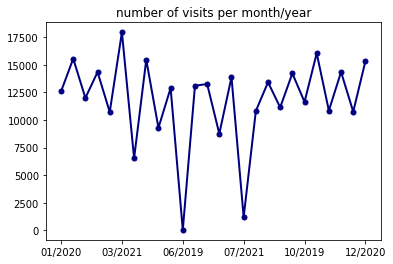

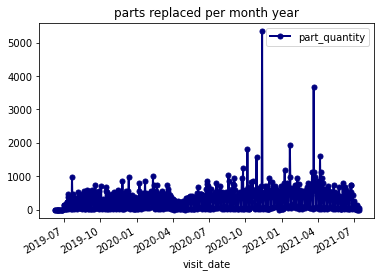

In [19]:
numOfVisitsPerMonthYear = df.month_year.value_counts().sort_index()
partQuanPerMonthYear = pd.DataFrame(df.groupby(df.visit_date)['part_quantity'].sum())

numOfVisitsPerMonthYear.plot(lw=2, colormap='jet', marker='.', markersize=10, 
         title='number of visits per month/year')
partQuanPerMonthYear.plot(lw=2, colormap='jet', marker='.', markersize=10, 
         title='parts replaced per month year')
